# BMI 5330: Breast Cancer and the ERBB2 Gene


**Soheila Borhani**

Spring 2024

&emsp;

In [1]:
 # importing required python libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np  
import pandas as pd 
pd.set_option('display.max_columns', 500)

## Genomic Location of ERBB2


- **HGNC-approved name:** Erb-b2 Receptor Tyrosine Kinase 2 

- **Gene type:** Protein Coding

- **Location:** Chromosome 17: 39,687,914 – 39,730,426 (GRCh38)

- **Strand:** Forward (+)

- **Number of exons:** 35

- **List of neighboring genes:** GRB7, PPP1R1B, STARD3, ...

<img src='images/ERBB2_location.png'>

Visualization of the location of ERBB2 (highlighted in green) and its neighboring genes using the Ensembl genome browser.   

&emsp;

## Analysis of ERBB2 Variants

In [2]:
# loading ClinVar data
# Source: https://www.ncbi.nlm.nih.gov/clinvar/?term=erbb2%5Bgene%5D&redir=gene
df_clinvar = pd.read_csv('data/ClinVar.txt', sep='\t')

In [3]:
# prinitng the first 5 rows of the data
df_clinvar.head(5)

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Variant type,Molecular consequence,Germline classification,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24
0,GRCh38/hg38 17q23.1-25.1(chr17:36449220-750531...,ABCA10|ADAM11|AMZ2|ANKFN1|AKAP1|AKAP1-DT|ACACA...,NaN,See cases,VCV000148363,17,57595736 - 73049225,17.0,36449220 - 75053130,148363,158114,NaN,NaN,copy number gain,NaN,Pathogenic,"Jan 1, 2011",no assertion criteria provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GRCh38/hg38 17q21.33-24.2(chr17:36449220-68170...,LOC130060795|LOC130060796|LOC130060807|LOC1300...,NaN,See cases,VCV000057282,17,48563237 - 65936105,17.0,36449220 - 68170214,57282,71877,NaN,NaN,copy number gain,NaN,Pathogenic,"Jan 1, 2011","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GRCh38/hg38 17q12(chr17:39036037-39694679)x3,ARL5C|CACNB1|CDK12|ERBB2|FBXL20|LOC110120913|L...,NaN,See cases,VCV000152111,17,37192290 - 37850932,17.0,39036037 - 39694679,152111,161862,NaN,NaN,copy number gain,NaN,Likely benign,"Jan 1, 2013",no assertion criteria provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GRCh38/hg38 17q12-21.31(chr17:39199873-4562957...,AARSD1|ACBD4|ACLY|ADAM11|AOC2|AOC3|ARHGAP27|AR...,NaN,See cases,VCV000058696,17,37356126 - 43706945,17.0,39199873 - 45629579,58696,73291,NaN,NaN,copy number gain,NaN,Pathogenic,"Jan 1, 2011","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NM_001289936.2(ERBB2):c.22C>A (p.Pro8Thr),ERBB2,P8T,not specified,VCV000135519,17,37855834,17.0,39699581,135519,139258,rs4252596,NC_000017.11:39699580:C:A,single nucleotide variant,missense variant|intron variant,not provided,"Jan 1, 2013",no classification provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Total number of ERBB2 mutations in ClinVar:', len(df_clinvar))

Total number of ERBB2 mutations in ClinVar: 692


<AxesSubplot:>

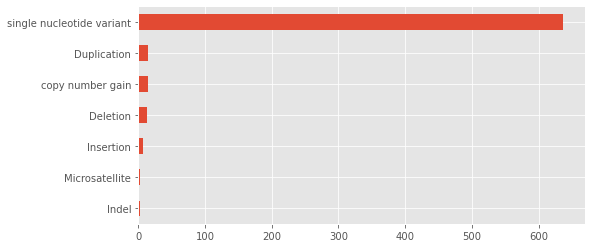

In [5]:
# plotting variant type distribution: SNV, insertion, deletion, etc.
plt.figure(figsize=(8,4))
df_clinvar['Variant type'].value_counts()[::-1].plot(kind='barh')

<BarContainer object of 8 artists>

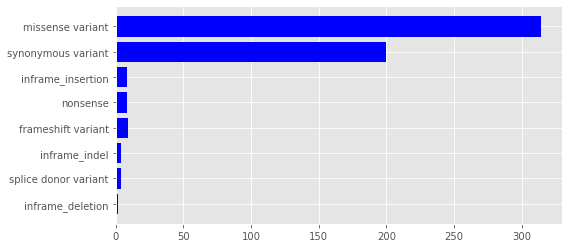

In [6]:
# plotting variant type by molecular consequence

molecular_consequences = [
    'missense variant',
    'synonymous variant',
    'inframe_insertion',
    'nonsense',
    'frameshift variant',
    'inframe_indel',
    'splice donor variant',
    'inframe_deletion',
]

vals = df_clinvar['Molecular consequence'].value_counts().values
inds = df_clinvar['Molecular consequence'].value_counts().index

variation_type_dictionary = {}
for consequence in molecular_consequences:
    count = 0
    for j, item in enumerate(inds):
        if consequence in item:
            count += vals[j]
    variation_type_dictionary[consequence] = count   
    
    
plt.figure(figsize=(8,4))
value_list = list(variation_type_dictionary.values())[::-1]
range_list = range(len(variation_type_dictionary))
labels = list(variation_type_dictionary.keys())[::-1]
plt.barh(range_list, value_list, tick_label=labels, color='b')    

In [7]:
df_clinvar['Germline classification'].value_counts()

Uncertain significance                          304
Likely benign                                   282
Benign                                           37
Pathogenic                                       24
Likely pathogenic                                19
not provided                                     13
Pathogenic/Likely pathogenic                      6
Benign/Likely benign                              5
Conflicting classifications of pathogenicity      2
Name: Germline classification, dtype: int64

In [8]:
# focusing only on pathogenic/likely pathogenic mutations
pathogenic_list = [
    'Pathogenic',
    'Likely pathogenic',
    'Pathogenic/Likely pathogenic']
df_pathogenic = df_clinvar[df_clinvar['Germline classification'].isin(pathogenic_list)]

In [9]:
disease_dictionary = {
    'Breast cancer': 1,
    'Lung cancer': 2,
    'Bladder cancer': 3,
    'Gastric cancer': 4,
    'Esophageal cancer': 5,
    'Uterine cancer': 6,
    'Renal cancer': 7,
    'Skin cancer': 8,
    'Ovarian cancer': 9,
}

In [10]:
# extracting location data for pathogenic variants 
locs = []
for index, row in df_pathogenic.iterrows():
    for disease in disease_dictionary.keys():
        if disease.lower()[:4] in row['Condition(s)'].lower():
            if ' - ' in row['GRCh38Location']:
                start_index = int(row['GRCh38Location'].split(' - ')[0])
                end_index = int(row['GRCh38Location'].split(' - ')[1])
                for j in range(start_index, end_index+1):
                    locs.append([disease, j])
            else:
                locs.append([disease, int(row['GRCh38Location'])])

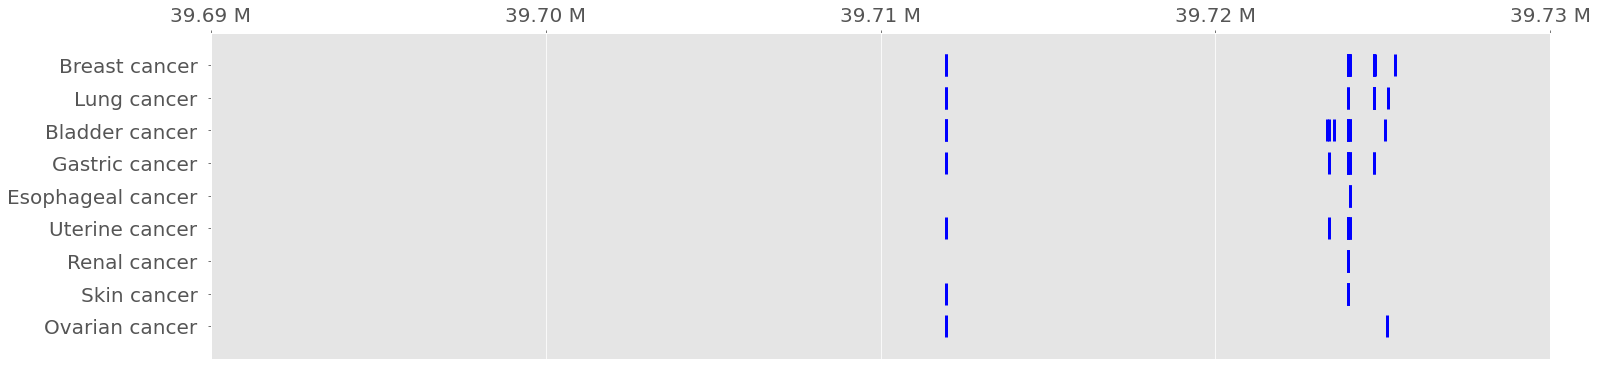

In [11]:
# plotting location data for pathogenic variants  
fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(111)
for d, j in locs:
    plt.scatter(j, len(disease_dictionary)+1 - disease_dictionary[d], 
                color='b', s=450, alpha=1, marker='|', lw=3)

plt.yticks(np.arange(len(disease_dictionary),0,-1), [i+' ' for i in disease_dictionary.keys()], fontsize=20) 
plt.xticks([39690000,   39700000,  39710000,  39720000,  39730000],
           ['39.69 M', '39.70 M', '39.71 M', '39.72 M', '39.73 M'], fontsize=20) 

plt.ylim(0, len(disease_dictionary)+1)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.yaxis.grid()

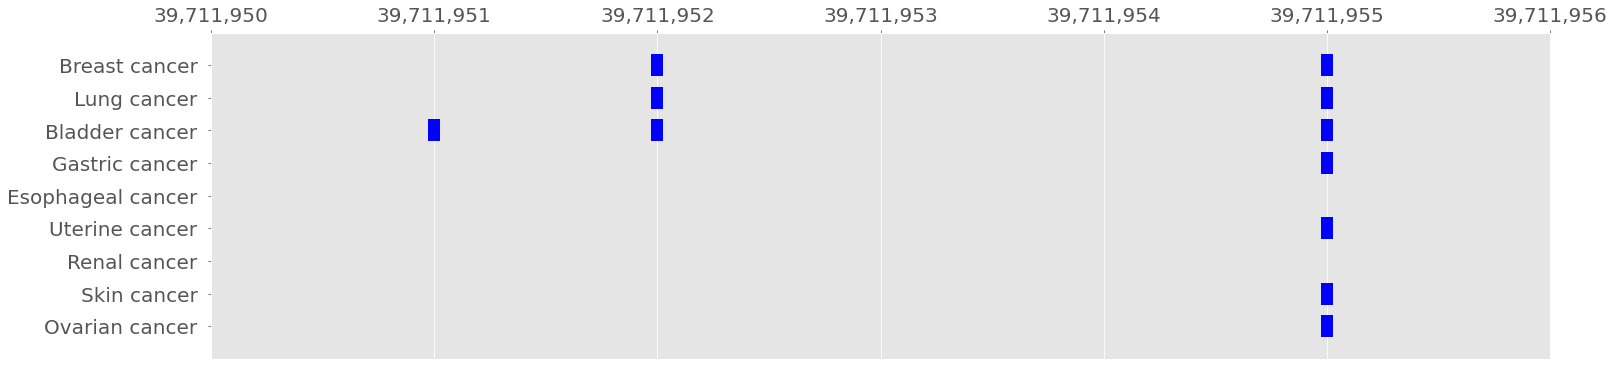

In [12]:
# zooming in on a narrow genomic band. ch17:39,711,950 - 39,711,956    
fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(111)
for d, j in locs:
    plt.scatter(j, len(disease_dictionary)+1 - disease_dictionary[d], 
                color='b', s=450, alpha=1, marker='|', lw=12)

plt.yticks(np.arange(len(disease_dictionary),0,-1), [i+' ' for i in disease_dictionary.keys()], fontsize=20) 
plt.xticks([39711950, 39711951, 39711952, 39711953, 39711954, 39711955, 39711956],
           ['39,711,950', '39,711,951', '39,711,952', '39,711,953', '39,711,954', '39,711,955', '39,711,956'], fontsize=20) 

plt.ylim(0, len(disease_dictionary)+1)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.yaxis.grid()
plt.xlim(39711950, 39711956)

&emsp;

In [13]:
# loading dbSNP data
# source: https://www.ncbi.nlm.nih.gov/snp/?term=erbb2
df_snp = pd.read_csv('data/dbSNP.txt', sep='\t')

In [14]:
# prinitng the first 5 rows of the data
df_snp.head(5)

,#chr,pos,variation,variant_type,snp_id,clinical_significance,validation_status,function_class,gene,frequency
0,17,39724858,"C>A,G,T",snv,587778267,not-provided,by-frequency;by-alfa;by-cluster,coding_sequence_variant;upstream_transcript_va...,ERBB2;MIR4728,T:0.000004:1:GnomAD_exomes|T:0.000008:2:TOPMED...
1,17,39723488,"G>A,C",snv,747584308,NaN,by-frequency;by-alfa;by-cluster,intron_variant;genic_downstream_transcript_var...,ERBB2,A:0.000025:3:ExAC|A:0.000036:5:GnomAD|A:0.0000...
2,17,39715470,"C>A,G,T",snv,747327229,NaN,by-frequency;by-alfa;by-cluster,intron_variant;coding_sequence_variant;non_cod...,ERBB2,T:0.000008:1:ExAC|T:0.000007:1:GnomAD|T:0.0000...
3,17,39717388,"C>A,G,T",snv,747200104,NaN,by-frequency;by-alfa;by-cluster,coding_sequence_variant;missense_variant;intro...,ERBB2,T:0.000025:3:ExAC|A:0.000014:2:GnomAD|T:0.0000...
4,17,39687867,G>A,snv,746846864,NaN,by-frequency;by-alfa;by-cluster,coding_sequence_variant;upstream_transcript_va...,ERBB2;PGAP3,A:0.000055:2:ExAC|A:0.000007:1:GnomAD|A:0.0000...


In [15]:
df_snp = df_snp[['pos', 'variation', 'variant_type', 'frequency']]
df_snp = df_snp[df_snp['frequency'].isnull()==False]
df_snp = df_snp[df_snp['frequency'].str.contains('1000Genomes')]

In [16]:
# extracting data from 1000 genome project
def extract_1000_genome_freq(string):
    splitted_string = string.split('|')
    freqs = []
    for item in splitted_string:
        if '1000Genomes' in item:
            freq = item.split(':')[1]
            return float(freq)
                    
df_snp['1000_genome_frequency'] = df_snp.apply(lambda row: extract_1000_genome_freq(row['frequency']),axis=1) 

<AxesSubplot:>

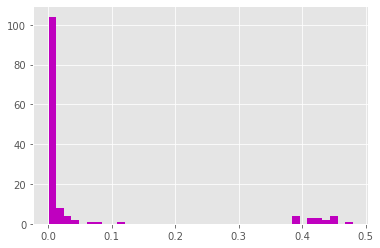

In [17]:
df_snp['1000_genome_frequency'].hist(bins=40, color='m')

In [18]:
# printing top 10 common variants 
temp = df_snp.sort_values(by='1000_genome_frequency', ascending=False).head(10)
temp = temp[['pos', 'variation', 'variant_type', '1000_genome_frequency']]
temp = temp.rename(columns={"pos": "Position", 
                            "variation": "Variation",
                            'variant_type': 'Type',
                            '1000_genome_frequency': 'Frequency'})
temp

,Position,Variation,Type,Frequency
221,39696865,A>G,snv,0.480012
224,39690268,T>C,snv,0.450344
227,39687428,"C>G,T",snv,0.449250
229,39696844,C>T,snv,0.444722
236,39727784,"C>A,G,T",snv,0.444254
237,39723509,"G>A,C,T",snv,0.443473
238,39712462,C>T,snv,0.437071
217,39687297,T>C,snv,0.431918
226,39687606,"G>A,C",snv,0.431918
225,39690259,A>T,snv,0.430824


In [19]:
# printing top 10 rare variants 
temp = df_snp.sort_values(by='1000_genome_frequency', ascending=True).head(10)
temp = temp[['pos', 'variation', 'variant_type', '1000_genome_frequency']]
temp = temp.rename(columns={"pos": "Position", 
                            "variation": "Variation",
                            'variant_type': 'Type',
                            '1000_genome_frequency': 'Frequency'})
temp

,Position,Variation,Type,Frequency
543,39724404,"C>G,T",snv,0.000156
214,39709828,"C>A,G,T",snv,0.000156
326,39717480,"C>A,G,T",snv,0.000156
74,39687862,G>C,snv,0.000156
75,39727732,"C>A,G,T",snv,0.000156
77,39727516,"C>A,G,T",snv,0.000156
80,39724864,"C>G,T",snv,0.000156
81,39712273,"G>A,C,T",snv,0.000156
83,39720953,C>T,snv,0.000156
85,39727369,"C>A,G,T",snv,0.000156


&emsp;

## ERBB2 Expression Levels in Various Tissues

In [20]:
# loading GTEx data
# Source: Data was downloaded from https://genome.ucsc.edu/cgi-bin/hgTables
# ERBB2 Gene ID: ENSG00000141736.13
df_gtex = pd.read_csv('data/GTEx.csv')

In [21]:
# score is gene expression measured in TPM (Transcripts Per Million)
df_gtex

,"#""geneId""",sample,tissue,score
0,ENSG00000141736.13,GTEX-1117F-0226-SM-5GZZ7,adiposeSubcut,25.590
1,ENSG00000141736.13,GTEX-ZZPU-2726-SM-5NQ8O,adiposeSubcut,12.110
2,ENSG00000141736.13,GTEX-ZZ64-1626-SM-5E43W,adiposeSubcut,6.770
3,ENSG00000141736.13,GTEX-ZYY3-0226-SM-5E45M,adiposeSubcut,5.799
4,ENSG00000141736.13,GTEX-ZYW4-0226-SM-5E44M,adiposeSubcut,15.870
...,...,...,...,...
17377,ENSG00000141736.13,GTEX-1122O-0005-SM-5O99J,wholeBlood,0.882
17378,ENSG00000141736.13,GTEX-R55E-2026-SM-EZ6L1,kidneyMedulla,143.900
17379,ENSG00000141736.13,GTEX-TKQ2-0626-SM-EZ6LB,kidneyMedulla,76.260
17380,ENSG00000141736.13,GTEX-T5JC-1626-SM-EZ6KW,kidneyMedulla,53.380


In [22]:
print('Number of samples:', len(df_gtex)) 
print('Number of tissues:', len(df_gtex['tissue'].value_counts())) 

Number of samples: 17382
Number of tissues: 54


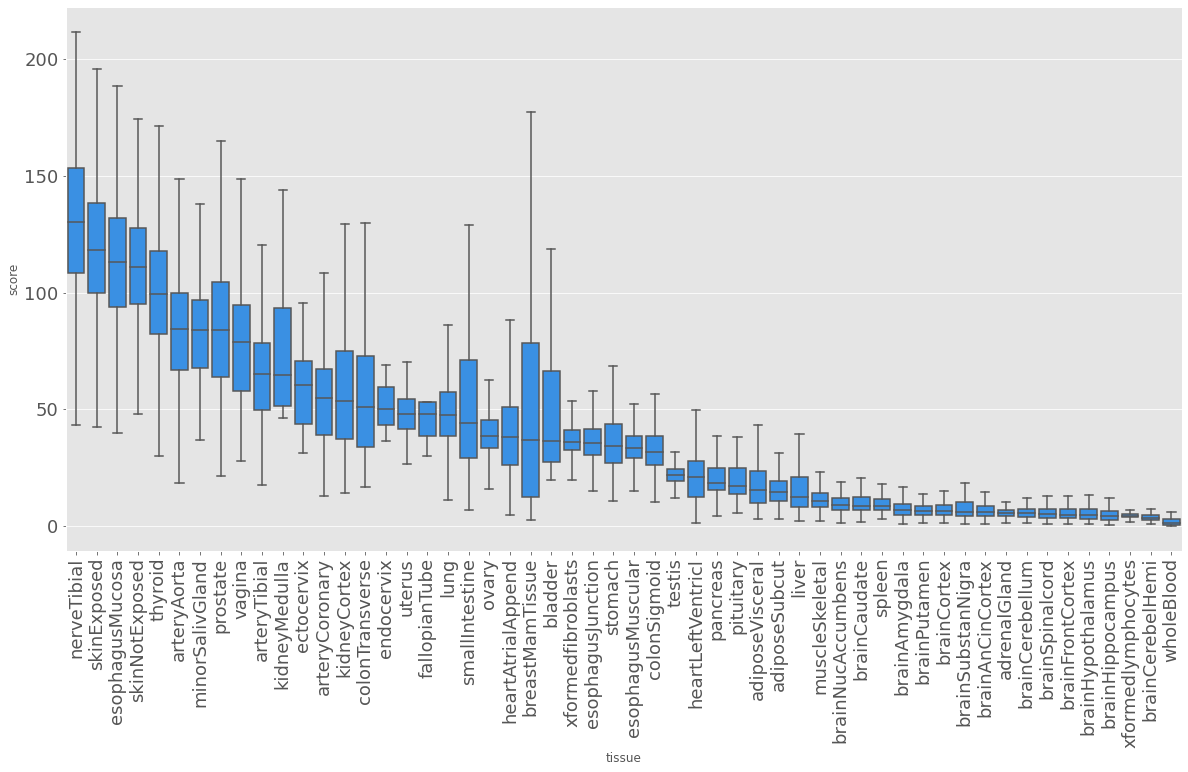

In [23]:
# plotting the distribution of TPM scores across all tissues
plt.figure(figsize=(20,10))
order = df_gtex.groupby("tissue")["score"].median().fillna(0).sort_values()[::-1].index
ax = sns.boxplot(x='tissue', 
                 y='score', 
                 data=df_gtex, 
                 showfliers=False, 
                 color="dodgerblue", 
                 order=order)

plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

&emsp;

## Three-dimensional Structure of the HER2 Protein

FASTA files containing ERBB2 protein sequences were downloaded from: 
https://www.ncbi.nlm.nih.gov/gene/2064

In [24]:
protein_seq = '''
MKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTNASLSFLQDIQEVQGYVLIAHNQVRQVPLQRLR
IVRGTQLFEDNYALAVLDNGDPLNNTTPVTGASPGGLRELQLRSLTEILKGGVLIQRNPQLCYQDTILWK
DIFHKNNQLALTLIDTNRSRACHPCSPMCKGSRCWGESSEDCQSLTRTVCAGGCARCKGPLPTDCCHEQC
AAGCTGPKHSDCLACLHFNHSGICELHCPALVTYNTDTFESMPNPEGRYTFGASCVTACPYNYLSTDVGS
CTLVCPLHNQEVTAEDGTQRCEKCSKPCARVCYGLGMEHLREVRAVTSANIQEFAGCKKIFGSLAFLPES
FDGDPASNTAPLQPEQLQVFETLEEITGYLYISAWPDSLPDLSVFQNLQVIRGRILHNGAYSLTLQGLGI
SWLGLRSLRELGSGLALIHHNTHLCFVHTVPWDQLFRNPHQALLHTANRPEDECVGEGLACHQLCARGHC
WGPGPTQCVNCSQFLRGQECVEECRVLQGLPREYVNARHCLPCHPECQPQNGSVTCFGPEADQCVACAHY
KDPPFCVARCPSGVKPDLSYMPIWKFPDEEGACQPCPINCTHSCVDLDDKGCPAEQRASPLTSIISAVVG
ILLVVVLGVVFGILIKRRQQKIRKYTMRRLLQETELVEPLTPSGAMPNQAQMRILKETELRKVKVLGSGA
FGTVYKGIWIPDGENVKIPVAIKVLRENTSPKANKEILDEAYVMAGVGSPYVSRLLGICLTSTVQLVTQL
MPYGCLLDHVRENRGRLGSQDLLNWCMQIAKGMSYLEDVRLVHRDLAARNVLVKSPNHVKITDFGLARLL
DIDETEYHADGGKVPIKWMALESILRRRFTHQSDVWSYGVTVWELMTFGAKPYDGIPAREIPDLLEKGER
LPQPPICTIDVYMIMVKCWMIDSECRPRFRELVSEFSRMARDPQRFVVIQNEDLGPASPLDSTFYRSLLE
DDDMGDLVDAEEYLVPQQGFFCPDPAPGAGGMVHHRHRSSSTRSGGGDLTLGLEPSEEEAPRSPLAPSEG
AGSDVFDGDLGMGAAKGLQSLPTHDPSPLQRYSEDPTVPLPSETDGYVAPLTCSPQPEYVNQPDVRPQPP
SPREGPLPAARPAGATLERPKTLSPGKNGVVKDVFAFGGAVENPEYLTPQGGAAPQPHPPPAFSPAFDNL
YYWDQDPPERGAPPSTFKGTPTAENPEYLGLDVPV
'''

Next, `Blastp` was queried using the above protein sequence. Clicking on the `AlphaFold Structure` renders the three-dimensional representation of the protein sequence.  

<img src='images/3D_structure.png'>

Three distinct views of the three-dimensional structure of the HER2 protein created using iCn3D viewer. 

&emsp;

## Prediction of HER2 Status Using Machine Learning

In [25]:
# loading training data
train_input = pd.read_csv('data/train/input.csv').set_index('sample_id')
train_input = train_input[['ERBB2_copy_number', 'ERBB2_CEP17_ratio', 'ERBB2_minus_ploidy']]
train_input

,ERBB2_copy_number,ERBB2_CEP17_ratio,ERBB2_minus_ploidy
sample_id,,,
CPCT02020203T,2,1.000000,-1.6971
CPCT02180049T,4,1.000000,0.5770
WIDE01010074T,25,12.500000,22.0631
CPCT02460004T,9,9.000000,6.9487
CPCT02190024T,16,8.000000,12.8407
...,...,...,...
CPCT02230021T,48,24.000000,45.0714
DO220822,2,1.000000,-0.1184
TCGA-A2-A259T,2,0.333333,-2.3006


In [26]:
train_output = pd.read_csv('data/train/output.csv').set_index('sample_id')
train_output

,Class
sample_id,
CPCT02020203T,0
CPCT02180049T,0
WIDE01010074T,1
CPCT02460004T,1
CPCT02190024T,1
...,...
CPCT02230021T,1
DO220822,0
TCGA-A2-A259T,0


In [27]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
NB_model = clf.fit(train_input, train_output['Class'])

In [28]:
# loading test data
test_input = pd.read_csv('data/test/input.csv').set_index('sample_id')
test_input = test_input[['ERBB2_copy_number', 'ERBB2_CEP17_ratio', 'ERBB2_minus_ploidy']]
test_output = pd.read_csv('data/test/output.csv').set_index('sample_id')

In [29]:
from sklearn.metrics import accuracy_score, recall_score

# calculate model performance
def calc_performance_metrics(model, test_input, test_output):
    y_actual = test_output['IHC HER2']
    y_predicted = model.predict(test_input)
    accuracy = accuracy_score(y_actual, y_predicted)
    sensitivity = recall_score(y_actual, y_predicted)
    specificty = recall_score(y_actual, y_predicted, pos_label=0)
    return accuracy, sensitivity, specificty

In [30]:
accuracy, sensitivity, specificty = calc_performance_metrics(NB_model, test_input, test_output)

In [31]:
print('Naive Bayes Classifier')
print('Accuracy:', np.round(accuracy,3))
print('Sensitivity:', np.round(sensitivity,3))
print('Specificty:', np.round(specificty,3))

Naive Bayes Classifier
Accuracy: 0.973
Sensitivity: 0.826
Specificty: 0.994


In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
LR_model = clf.fit(train_input, train_output['Class'])

accuracy, sensitivity, specificty = calc_performance_metrics(LR_model, test_input, test_output)

print('Logistic Regression Classifier')
print('Accuracy:', np.round(accuracy,3))
print('Sensitivity:', np.round(sensitivity,3))
print('Specificty:', np.round(specificty,3))

Logistic Regression Classifier
Accuracy: 0.969
Sensitivity: 0.797
Specificty: 0.994


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
DT_model = clf.fit(train_input, train_output['Class'])

accuracy, sensitivity, specificty = calc_performance_metrics(DT_model, test_input, test_output)

print('Decision Tree Classifier')
print('Accuracy:', np.round(accuracy,3))
print('Sensitivity:', np.round(sensitivity,3))
print('Specificty:', np.round(specificty,3))

Decision Tree Classifier
Accuracy: 0.942
Sensitivity: 0.841
Specificty: 0.956


In [37]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=300)
MLP_model = clf.fit(train_input, train_output['Class'])

accuracy, sensitivity, specificty = calc_performance_metrics(MLP_model, test_input, test_output)

print('Neural Network Classifier')
print('Accuracy:', np.round(accuracy,3))
print('Sensitivity:', np.round(sensitivity,3))
print('Specificty:', np.round(specificty,3))

Neural Network Classifier
Accuracy: 0.971
Sensitivity: 0.87
Specificty: 0.985
